# Multi-frequency Analysis

Plot data from maps of several different frequencies at only the same RA/Dec as the TRIS data.

Use a spectral index to approximately compare data (see Platania et al 1998) - scale everything to 0.6 GHz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.io import fits

from scipy.optimize import minimize

import const as const
import TRIS_vals as tris
import LogProb as LP

from const import *
from TRIS_vals import *
from multifreq_data import *

import importlib
importlib.reload(const);
importlib.reload(tris);

/home/nitika/.local/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 584.819674 arcmin (0.170117 rad) 
-> fwhm is 1377.145090 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 584.529302 arcmin (0.170033 rad) 
-> fwhm is 1376.461318 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/home/nitika/.local/lib/python3.6/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Sigma is 570.972611 arcmin (0.166089 rad) 
-> fwhm is 1344.537750 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [2]:
#R_disk, h_disk, j_disk, a_disk, R_halo, j_halo, a_halo, T_1420, T_820, T_600

print(freqs)

param0 = np.array([2*d, 0.5*d, 10**(-41), 0.7, 3*d, 10**(-41), 0.7, 0.5, 0.5, 0.5]) 
# np.array([10**(22.76), 10**(22.23), 10**(-40), 0.7, 10**(22.40), 10**(-41), 0.7, 0.5])
print(LP.lnprob_multi(param0, [d, 0., 10**(-45), 0, d, 10**(-45),0, 0,0,0], [10*d, 2*d, 10**(-40), 1, 10*d, 10**(-40), 1, 10,10,10]))

def multifreq_minimize(param): 
    return -1*LP.multifreq(param)

nu = 600e6
param02 = np.array([10**(22.76), 10**(22.23), 10**(-40), 10**(22.40), 10**(-41), 0.5])
print(LP.diskhalo_TRIS(param02, nu))
res = minimize(multifreq_minimize, param0)

[1.42e+09 8.20e+08 6.00e+08 4.08e+08 1.50e+08]
-175395.9671737411
-1147908.871847254


/home/nitika/GradSchool/Research/Radio_Background/radio-background/ModelDefinitions.py:54: RuntimeWarning: invalid value encountered in arcsin
  B_halo_below = (np.pi - b - np.arcsin((d_proj/R_eff_below)*np.sin(b)))


In [ ]:
print(res.x)
print(param0)

In [2]:
# spectral index from Platania et al 1998
B = 2.76
B_err = 0.11

c_icrs = SkyCoord(ra=TRIS_ra[0.82e9]*u.degree, dec=42*u.degree, frame='icrs')
c_gal = c_icrs.galactic

TRIS_bw = 2*11.48

# define function to scale things down to 0.6 GHz
def scale600Mhz(data, errs, nu):
    scaled = (data)*(((0.6e9/nu)**(-B)))
    scaled_errs = np.sqrt((np.transpose(errs)*((0.6e9/nu)**(-B)))**2 + (B_err*(data)*((0.6e9/nu)**(-B))*np.log(0.6e9/nu))**2)
    return scaled, scaled_errs

## TRIS ##
0.6 and 0.82 GHZ

In [3]:
#fig = plt.figure(figsize=(15,4))
# fig.subplots_adjust(hspace=0.4, wspace=0.25, top=0.92)

# plt.subplot(1, 2, 1)
# plt.plot(TRIS_ra[0.6e9], TRIS_Tgal[0.6e9],'darkblue', marker='.', label=('$T_{gal}$'))
# plt.errorbar(TRIS_ra[0.6e9], TRIS_Tgal[0.6e9], TRIS_Tberrs[0.6e9], color='slateblue', linestyle='None', label=('$\sigma_{T}$ (smaller than data markers)'))
# plt.title('TRIS Galactic Temperature at 0.6 GHz', fontsize=14)
# plt.xlabel('RA', fontsize=14)
# plt.ylabel('Brightness Temperature (K)', fontsize=14)
# plt.legend();

# plt.subplot(1, 2, 2)
# plt.plot(TRIS_ra[0.82e9], TRIS_Tgal[0.82e9],'darkblue', marker='.', label=('$T_{gal}$'))
# plt.errorbar(TRIS_ra[0.82e9], TRIS_Tgal[0.82e9], yerr=np.transpose(TRIS_Tberrs[0.82e9]), color='slateblue', linestyle='None', label=('$\sigma_{T}$'))
# plt.title('TRIS Galactic Temperature at 0.82 GHz', fontsize=14)
# plt.xlabel('RA', fontsize=14)
# plt.ylabel('Brightness Temperature (K)', fontsize=14)
# plt.legend();

TRIS82_scaled, TRIS82_errs_scaled = scale600Mhz(TRIS_Tgal[0.82e9],TRIS_Tberrs[0.82e9], 0.82e9)

### Reich and Reich ###

1.4 GHz

In [4]:
map_1420 = hp.read_map('STOCKERT+VILLA-ELISA_1420MHz_1_256.fits')/1000
NSIDE_rr = hp.get_nside(map_1420)
#map_1420[np.where(map_1420 < 0)] = None
#hp.mollview(map_1420)

map_1420_bw = 35.4/60 #deg
#smooth map to resolution of TRIS
map_1420_smooth = hp.sphtfunc.smoothing(map_1420, fwhm=np.deg2rad(np.sqrt(TRIS_bw**2 - map_1420_bw**2)))
#hp.mollview(map_1420_smooth)

rr_errs = np.ones(len(TRIS_ra[0.82e9]))*(0.5)
rr_idx = hp.ang2pix(NSIDE_rr, c_gal.l.value, c_gal.b.value, lonlat=True)

rr_scaled, rr_errs_scaled = scale600Mhz(map_1420_smooth[rr_idx] - T_CMB, rr_errs, 1.4e9)
# plt.plot(TRIS_ra[0.82e9], rr_scaled)
# plt.errorbar(TRIS_ra[0.82e9], rr_scaled, yerr=rr_errs_scaled, linestyle='None', label=('$\sigma_{T}$'))



/home/nitika/.local/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 584.819674 arcmin (0.170117 rad) 
-> fwhm is 1377.145090 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# Haslam 408 MHz Map 


In [5]:
haslam = hp.read_map('haslam408_ds_Remazeilles2014.fits') #destriped only
haslam_bw = 56/60 #deg
haslam_smooth = hp.sphtfunc.smoothing(haslam, fwhm=np.deg2rad(np.sqrt(TRIS_bw**2 - haslam_bw**2)))
#hp.mollview(haslam_smooth)

NSIDE_haslam = hp.get_nside(haslam)
haslam_idx = hp.ang2pix(NSIDE_haslam, c_gal.l.value, c_gal.b.value, lonlat=True)

haslam_errs = 3 #quoted zero level uncertainty from original map
haslam_monopole = 8.9 # Wehus et al 2014

haslam_scaled, haslam_errs_scaled = scale600Mhz(haslam_smooth[haslam_idx] - T_CMB, haslam_errs, .408e9)
# plt.figure()
# plt.plot(TRIS_ra[0.82e9], haslam_scaled)
# plt.errorbar(TRIS_ra[0.82e9], haslam_scaled, yerr=haslam_errs_scaled, linestyle='None', label=('$\sigma_{T}$'))




NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 584.529302 arcmin (0.170033 rad) 
-> fwhm is 1376.461318 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# 150 MHz Map

In [10]:
map150 = hp.read_map('lambda_landecker_wielebinski_150MHz_SARAS_recalibrated_hpx_r8.fits')
map150_bw = 5 #deg
map150_smooth = hp.sphtfunc.smoothing(map150, fwhm=np.deg2rad(np.sqrt(TRIS_bw**2 - map150_bw**2)))

NSIDE_map150 = hp.get_nside(map150)
map150_idx = hp.ang2pix(NSIDE_map150, c_gal.l.value, c_gal.b.value, lonlat=True)
map150_errs = 40 #K

map150_scaled, map150_errs_scaled = scale600Mhz(map150_smooth[map150_idx] - T_CMB, map150_errs, .150e9)

/home/nitika/.local/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/nitika/.local/lib/python3.6/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 570.972611 arcmin (0.166089 rad) 
-> fwhm is 1344.537750 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


## Combine plots from all maps

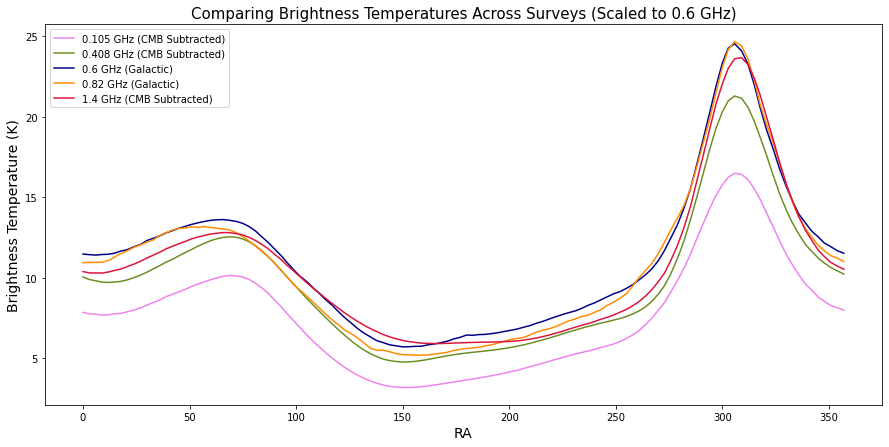

In [11]:
plt.figure(figsize=(15,7))
plt.title('Comparing Brightness Temperatures Across Surveys (Scaled to 0.6 GHz)', fontsize=15)
plt.xlabel('RA', fontsize=14)
plt.ylabel('Brightness Temperature (K)', fontsize=14)

plt.plot(TRIS_ra[0.82e9], map150_scaled, 'violet', label='0.105 GHz (CMB Subtracted)')
#plt.errorbar(TRIS_ra[0.82e9], haslam_scaled, yerr=haslam_errs_scaled, color='olivedrab', linestyle='None')

plt.plot(TRIS_ra[0.82e9], haslam_scaled, 'olivedrab', label='0.408 GHz (CMB Subtracted)')
#plt.errorbar(TRIS_ra[0.82e9], haslam_scaled, yerr=haslam_errs_scaled, color='olivedrab', linestyle='None')

plt.plot(TRIS_ra[0.6e9], TRIS_Tgal[0.6e9],'darkblue', label=('0.6 GHz (Galactic)'))
#plt.errorbar(TRIS_ra[0.6e9], TRIS_Tgal[0.6e9], TRIS_Tberrs[0.6e9], color='darkblue', linestyle='None')

plt.plot(TRIS_ra[0.6e9], TRIS82_scaled,'darkorange', label=('0.82 GHz (Galactic)'))
#plt.errorbar(TRIS_ra[0.6e9], TRIS82_scaled, TRIS82_errs_scaled, color='darkorange', linestyle='None')

plt.plot(TRIS_ra[0.82e9], rr_scaled, 'crimson', label='1.4 GHz (CMB Subtracted)')
#plt.errorbar(TRIS_ra[0.82e9], rr_scaled, yerr=rr_errs_scaled, linestyle='None', color='crimson')

plt.legend()
plt.savefig('multifreq_Tb.png', bbox_inches='tight')

